In [73]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from copy import copy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
#installation of gensim reqd

In [75]:
from gensim.models import Word2Vec

In [76]:
#df = pd.read_csv("/content/drive/MyDrive/MLAssignment3/IMDBDataset.csv")
#df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df = pd.read_csv("IMDBDataset.csv")
df

In [77]:
positive = df[df['sentiment']=='positive']
positive

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [78]:
negative = df[df['sentiment']=='negative']
negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Q1.1: Word Clouds For positive and negative review

In [79]:
positive_reviewStr = " ".join(review for review in positive['review'])

In [80]:
positive_word_cloud = WordCloud(collocations = False, background_color = 'white').generate(positive_reviewStr)
positive_word_cloud

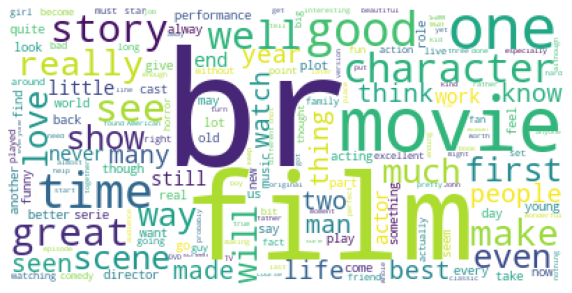

In [81]:
plt.figure(figsize=(10,10))
plt.imshow(positive_word_cloud)
plt.axis("off")
plt.show()

In [82]:
negative_reviewStr = " ".join(review for review in negative['review'])

In [83]:
negative_word_cloud = WordCloud(collocations = False, background_color = 'white').generate(negative_reviewStr)

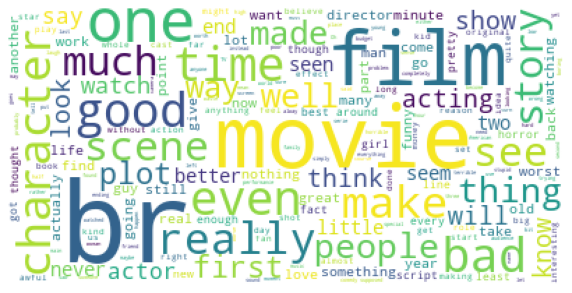

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(negative_word_cloud)
plt.axis("off")
plt.show()

Q1:2: Pre-Processing of text

In [85]:
#Converting review to lower case
dp = df['review'].str.lower()

In [86]:
#Removing tags present in review
dp = dp.str.replace('<.*?>','')

In [87]:
#Removing URLs present in review
dp = dp.str.replace(r'http\S+','')

In [88]:
#Removing punctuations
dp = dp.str.replace('[^\w\s]','')

In [89]:
dp

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [90]:
#Removing Stop words
stop_words = nltk.corpus.stopwords.words('english')


In [91]:
dt = dp.apply(lambda a: " ".join(i for i in a.split() if i not in stop_words))

In [92]:
dt

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [93]:
df['review'] = dt

In [94]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,im going disagree previous comment side maltin...,negative


Word Clouds after the pre-processing

In [95]:
positive = df[df['sentiment']=='positive']

In [96]:
positive_reviewStr = " ".join(review for review in positive['review'])

In [97]:
positive_word_cloud = WordCloud(collocations = False, background_color = 'white').generate(positive_reviewStr)


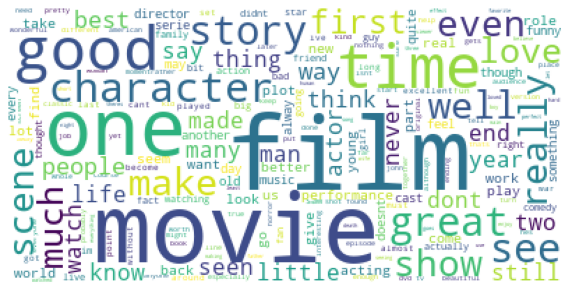

In [98]:
plt.figure(figsize=(10,10))
plt.imshow(positive_word_cloud)
plt.axis("off")
plt.show()

In [99]:
negative = df[df['sentiment']=='negative']

In [100]:
negative_reviewStr = " ".join(review for review in negative['review'])

In [101]:
negative_word_cloud = WordCloud(collocations = False, background_color = 'white').generate(negative_reviewStr)


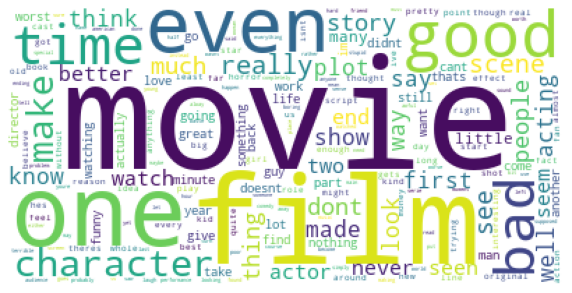

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(negative_word_cloud)
plt.axis("off")
plt.show()

Q1:3: Word2Vec and Pca Plot

In [103]:
sentences = []
for s in df['review']:
  sentences.append(s.split())
#sentences[:2]

In [104]:
model = Word2Vec(sentences,min_count=1) #every word is a vector

In [105]:
type(model['time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [106]:
print(model)

Word2Vec(vocab=221822, size=100, alpha=0.025)


In [107]:
def avgWord2Vec(a):
  vec = np.zeros_like(model['time'])
  for x in a.split():
    vec += model[x]
  avg = vec/len(a.split())

  return avg

In [108]:
avg_vec = df['review'].apply(lambda s : avgWord2Vec(s))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [109]:
df['avg_word2vec'] = avg_vec

In [110]:
df

,review,sentiment,avg_word2vec
0,one reviewers mentioned watching 1 oz episode ...,positive,"[-0.08602393, -0.6460757, 0.30262652, 0.533446..."
1,wonderful little production filming technique ...,positive,"[0.1200101, -0.29712245, 0.59396106, 0.8711487..."
2,thought wonderful way spend time hot summer we...,positive,"[0.1925248, -0.6885963, 0.6689868, 0.75530154,..."
3,basically theres family little boy jake thinks...,negative,"[0.21571088, -0.76899207, 0.4970115, 1.1183016..."
4,petter matteis love time money visually stunni...,positive,"[0.23628321, -0.4787276, 0.50655353, 0.9562047..."
...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,"[0.49769202, -0.8462258, 0.5620668, 1.2216287,..."
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[0.39367226, -0.44315323, 0.39159542, 0.606862..."
49997,catholic taught parochial elementary schools n...,negative,"[0.1205863, -0.24270342, 0.33707386, 0.7416392..."
49998,im going disagree previous comment side maltin...,negative,"[-0.079132065, -0.50862163, 0.19908129, 0.6762..."


In [111]:
pca = PCA(n_components=2)
pca_model = pca.fit_transform(np.stack(df['avg_word2vec']))

In [112]:
positive_review = df['sentiment']=='positive'

In [113]:
positive_review

0         True
1         True
2         True
3        False
4         True
         ...  
49995     True
49996    False
49997    False
49998    False
49999    False
Name: sentiment, Length: 50000, dtype: bool

In [114]:
positive_pca = pca_model[positive_review]
positive_pca

array([[-0.6804454 , -0.7246792 ],
       [-0.80395734,  1.2382251 ],
       [ 0.04040184,  0.08854699],
       ...,
       [ 0.61908555, -0.01319499],
       [-1.897666  , -1.0496815 ],
       [ 2.0673583 , -0.20667903]], dtype=float32)

In [115]:
negative_review = df['sentiment'] == 'negative'
negative_pca = pca_model[negative_review]
negative_pca

array([[ 0.02894099, -0.6273331 ],
       [ 1.0075599 ,  0.40829185],
       [ 1.2393245 ,  1.2086108 ],
       ...,
       [-0.9788299 , -0.7199668 ],
       [-1.1663936 , -0.13571422],
       [ 2.124207  ,  0.39251247]], dtype=float32)

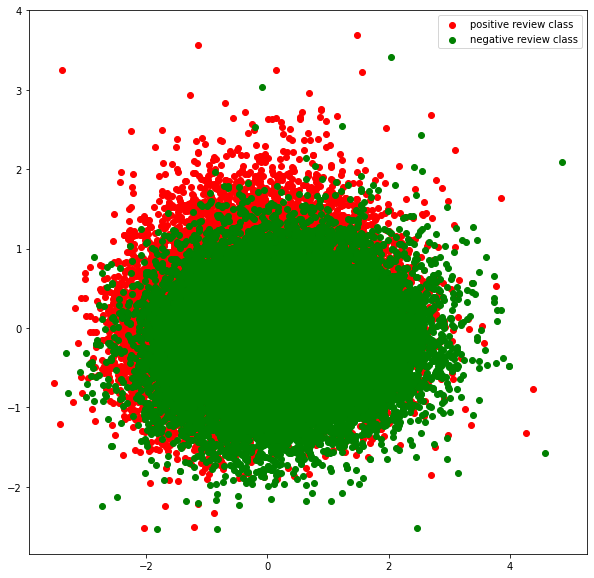

In [116]:
plt.figure(figsize=(10,10))
plt.scatter(positive_pca[:,0],positive_pca[:,1],color='red',label='positive review class')
plt.scatter(negative_pca[:,0],negative_pca[:,1],color ='green',label='negative review class')
plt.legend()
plt.show()

Q1:4:SVM With Different Kernels

In [117]:
df

,review,sentiment,avg_word2vec
0,one reviewers mentioned watching 1 oz episode ...,positive,"[-0.08602393, -0.6460757, 0.30262652, 0.533446..."
1,wonderful little production filming technique ...,positive,"[0.1200101, -0.29712245, 0.59396106, 0.8711487..."
2,thought wonderful way spend time hot summer we...,positive,"[0.1925248, -0.6885963, 0.6689868, 0.75530154,..."
3,basically theres family little boy jake thinks...,negative,"[0.21571088, -0.76899207, 0.4970115, 1.1183016..."
4,petter matteis love time money visually stunni...,positive,"[0.23628321, -0.4787276, 0.50655353, 0.9562047..."
...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,"[0.49769202, -0.8462258, 0.5620668, 1.2216287,..."
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[0.39367226, -0.44315323, 0.39159542, 0.606862..."
49997,catholic taught parochial elementary schools n...,negative,"[0.1205863, -0.24270342, 0.33707386, 0.7416392..."
49998,im going disagree previous comment side maltin...,negative,"[-0.079132065, -0.50862163, 0.19908129, 0.6762..."


In [118]:
def splitting(features,target,p):
  splitting_index= int(p * features.shape[0])
  train_X=features[0:splitting_index]
  train_y=target[0:splitting_index]
  test_X=features[splitting_index:]
  test_y= target[splitting_index:]
  return train_X,train_y,test_X,test_y

In [119]:
features = ['review', 'avg_word2vec']


In [120]:
train_X,train_y,test_X,test_y = splitting(df[features],df['sentiment'],0.8)

In [121]:
train_y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
39995    positive
39996    positive
39997    positive
39998    negative
39999    negative
Name: sentiment, Length: 40000, dtype: object

RBF

In [122]:
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(np.stack(train_X['avg_word2vec']),np.stack(train_y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
rbf_svm.score(np.stack(test_X['avg_word2vec']),np.stack(test_y))

0.869

In [124]:
rbf_svm.score(np.stack(train_X['avg_word2vec']),np.stack(train_y))

0.86935

Linear

In [125]:
linear_kernel_svm = svm.SVC(kernel = 'linear')
linear_kernel_svm.fit(np.stack(train_X['avg_word2vec']),np.stack(train_y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
linear_kernel_svm.score(np.stack(train_X['avg_word2vec']),np.stack(train_y))

0.8615

In [127]:
linear_kernel_svm.score(np.stack(test_X['avg_word2vec']),np.stack(test_y))

0.8646

Poly

In [128]:
poly_kernel_svm = svm.SVC(kernel = 'poly')
poly_kernel_svm.fit(np.stack(train_X['avg_word2vec']),np.stack(train_y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
poly_kernel_svm.score(np.stack(train_X['avg_word2vec']),np.stack(train_y))

0.8709

In [130]:
poly_kernel_svm.score(np.stack(test_X['avg_word2vec']),np.stack(test_y))

0.869

Sigmoid

In [131]:
sigmoid_kernel_svm = svm.SVC(kernel = 'sigmoid')
sigmoid_kernel_svm.fit(np.stack(train_X['avg_word2vec']),np.stack(train_y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
sigmoid_kernel_svm.score(np.stack(train_X['avg_word2vec']),np.stack(train_y))

0.68285

In [133]:
sigmoid_kernel_svm.score(np.stack(test_X['avg_word2vec']),np.stack(test_y))

0.686